In [19]:
!pip install --upgrade git+https://bitbucket.org/freemens/ion_sdk.git@master    
%env ALTERGO_FACTORY_API = https://staging.altergo.io/
%env ALTERGO_IOT_API = https://iot.staging.altergo.io/   

  Cloning https://bitbucket.org/freemens/ion_sdk.git (to revision master) to c:\users\gcoll\appdata\local\temp\pip-req-build-y7q8elmq
env: ALTERGO_FACTORY_API=https://staging.altergo.io/
env: ALTERGO_IOT_API=https://iot.staging.altergo.io/


  Running command git clone -q https://bitbucket.org/freemens/ion_sdk.git 'C:\Users\gcoll\AppData\Local\Temp\pip-req-build-y7q8elmq'


In [20]:
import pandas as pd
data = pd.read_csv('price.csv')
import matplotlib.pyplot as plt
import ion_sdk.edison_api.edison_api as eapi
import datetime
from ion_sdk.edison_api.models.factoryModel import EdisonGenericComponent, Model,CurrentState

edApi=eapi.Client("f6ad4f7166814976b66b9cb346ebc5dd")


In [21]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data=data.set_index('date')

In [22]:
print(data)

                     Price
date                      
2021-10-07 00:00:00   90.0
2021-10-07 01:00:00   50.2
2021-10-07 02:00:00   50.0
2021-10-07 03:00:00   63.0
2021-10-07 04:00:00   50.0
...                    ...
2021-10-14 20:00:00  191.0
2021-10-14 21:00:00  110.0
2021-10-14 22:00:00  171.0
2021-10-14 23:00:00  200.8
2021-10-15 00:00:00   90.0

[193 rows x 1 columns]


In [23]:
serial = "ET-1"
asset=edApi.getAsset(serial)
print(asset)

EdisonComponent(id=332, serial_number='ET-1', iot_data=None, model=Model(id=24, name='Energy trader', is_configurable=False, configuration_type=None, view_template=None, category=Category(id=2, name='Battery'), image=Image(id=14, name=None, file='d6a23423412dfa9208e557db46598932.jpeg'), configurations=[], parameters=[], sensors=[Sensor(name=None, plotly_js=None, array_map='1', id=58, format=None, sensor_model=SensorModel(code='eBY', id=24, name='Price', mapping='custom', unit='€/Mwh', type=<TypeEnum.FLOAT: 'float'>, data_structure=<DataStructure.ARRAY: 'array'>, scale=1.0, is_virtual=False, virtual_expression=''), ranges=[])], child_component_models=None), current_state=CurrentState(id=336, location='No location', description='No description', current_state_datetime=Datetime(date=datetime.datetime(2021, 10, 28, 9, 47, 2), timezone_type=3, timezone='UTC'), status=Status(id=6, name='In Stock', type=None), status_existential=Status(id=11, name='Complete', type=None), status_functional=Sta

In [24]:
uploadSensorList = edApi.refactorDataframeToAsset(data,asset)
asset.df=data
print(uploadSensorList)
edApi.updateSensorDataByFile(asset,uploadSensorList)

('Price', 100)
['Price']

Preparing payload
Payload sent successfully! Checkout: https://staging.altergo.io/core/iot/connected_component/view/332/graph


In [25]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='date'>

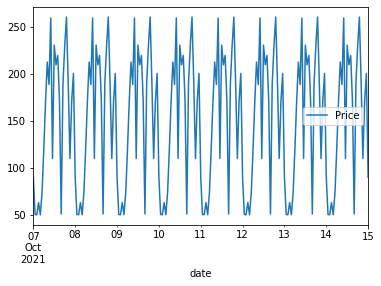

In [26]:
data.plot()